In [ ]:
import os

image_folder = r'Dataset\lung_colon_image_set\lung_image_sets'

count = 0

queue = 0

for filename in os.listdir(image_folder):
    count = 0
    for filename in os.listdir(os.path.join(image_folder, filename)):
        count+=1
    
    if queue==0:
        print(f"Akciğer Adenokarsinomu {count}")

    if queue==1:
        print(f"Akciğer Normal Doku {count}")

    if queue==2:
        print(f"Akciğer Yassı Hücreli Karsinomu {count}")
    queue+=1


Akciğer Adenokarsinomu 5000
Akciğer Normal Doku 5000
Akciğer Yassı Hücreli Karsinomu 5000


In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split

class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        
        
        if self.transform:
            image = self.transform(image)

        return image, label


classes = ['lung_aca', 'lung_n', 'lung_scc']

image_paths = []
labels = []

for label, cls in enumerate(classes):
    cls_folder = os.path.join(image_folder, cls)
    for image_name in os.listdir(cls_folder):
        image_paths.append(os.path.join(cls_folder, image_name))
        labels.append(label)


train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=48 #Muğla)


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


train_dataset = CustomDataset(train_paths, train_labels, transform=transform)
test_dataset = CustomDataset(test_paths, test_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)



NameError: name 'image_folder' is not defined

In [3]:
from torch.nn import  CrossEntropyLoss

from torch.nn import (
    Module,
    Linear,
    MaxPool2d,
    Conv2d
)
import torch.nn.functional as F


In [6]:
class CNN(Module):
    def __init__(self):
        super(CNN, self).__init__()
      
        self.conv1 = Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1) 

        self.conv2 = Conv2d(32, 64, kernel_size=3, padding=1)  

        self.conv3 = Conv2d(64, 128, kernel_size=3, padding=1)  

        self.conv4 = Conv2d(128,128,kernel_size=3, padding=1)
        self.pool = MaxPool2d(2,2)

        self.fc1 = Linear(25088, 1024) 
        self.fc2 = Linear(1024, 512)
        self.fc3 = Linear(512, 128)
        self.fc5 = Linear(128, 64)
        self.fc6 = Linear(64, 3)  
        
    def forward(self, x):
        x = F.relu(self.conv1(x))  
        x = self.pool(x)
        x = F.relu(self.conv2(x))  
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(x.size(0), -1)  

        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        
        return x


In [1]:
import torch 

torch.cuda.is_available()

True

In [7]:

def train(model, epochs):
   
    model.train()
    
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            optimizer.zero_grad(set_to_none=True)
            outputs = model(batch_X)
            
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            # Kayıp ve doğruluğu kaydetme
            all_loss.append(loss.item())
            total_loss += loss.item()
            
            # Doğruluğu hesaplama
            predicted = torch.argmax(outputs, dim=1)  
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)
            
            print(f'Loss: {loss.item()}')

        avg_loss = total_loss / len(train_loader)
        accuracy = correct / total
        epoch_loss.append(avg_loss)
        epoch_accuracy.append(accuracy)
        
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')
    return model


device = torch.device('cuda')
model = CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
all_loss = []
epoch_loss = []
epoch_accuracy = []


model = train(model= model, epochs= 50)


Loss: 1.1046946048736572
Loss: 1.090687870979309
Loss: 1.0095574855804443
Loss: 1.215869665145874
Loss: 1.0209612846374512
Loss: 1.046562910079956
Loss: 0.9670748114585876
Loss: 0.8954458832740784
Loss: 0.6632081866264343
Loss: 0.6640491485595703
Loss: 1.293961524963379
Loss: 0.39314600825309753
Loss: 0.4776309132575989
Loss: 0.6648106575012207
Loss: 0.5645949840545654
Loss: 0.4737376570701599
Loss: 0.5658919215202332
Loss: 0.5979334712028503
Loss: 0.5652298331260681
Loss: 0.45661789178848267
Loss: 0.451163649559021
Loss: 0.5473006367683411
Loss: 0.4339134693145752
Loss: 0.35533973574638367
Loss: 0.674277663230896
Loss: 0.5196139812469482
Loss: 0.45617395639419556
Loss: 0.5573428869247437
Loss: 0.547589898109436
Loss: 0.6834280490875244
Loss: 0.6690188050270081
Loss: 0.4398689866065979
Loss: 0.5573796033859253
Loss: 0.5441229343414307
Loss: 0.42736342549324036
Loss: 0.3437565565109253
Loss: 0.5554155707359314
Loss: 0.7409033179283142
Loss: 0.6285252571105957
Loss: 0.4991406798362732
Lo

KeyboardInterrupt: 

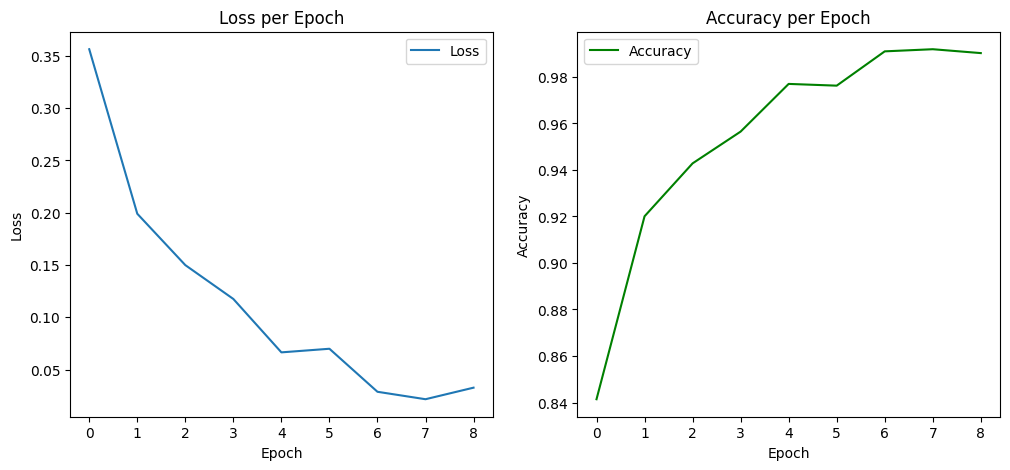

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(epoch_loss, label='Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(epoch_accuracy, label='Accuracy', color='green')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

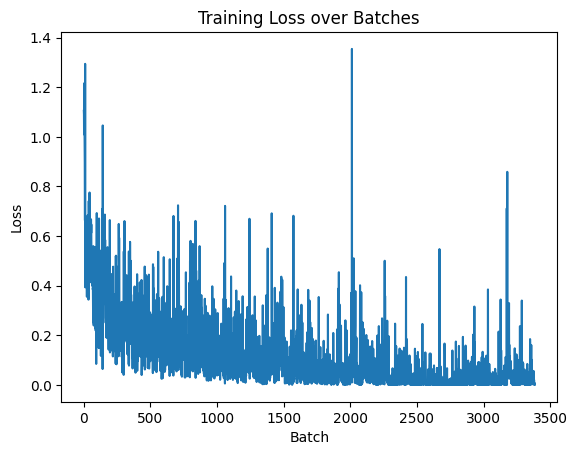

In [9]:
plt.plot(all_loss)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss over Batches')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0     0.9852    0.8968    0.9389      1037
           1     0.9969    0.9979    0.9974       970
           2     0.9041    0.9879    0.9442       993

    accuracy                         0.9597      3000
   macro avg     0.9621    0.9609    0.9602      3000
weighted avg     0.9621    0.9597    0.9596      3000



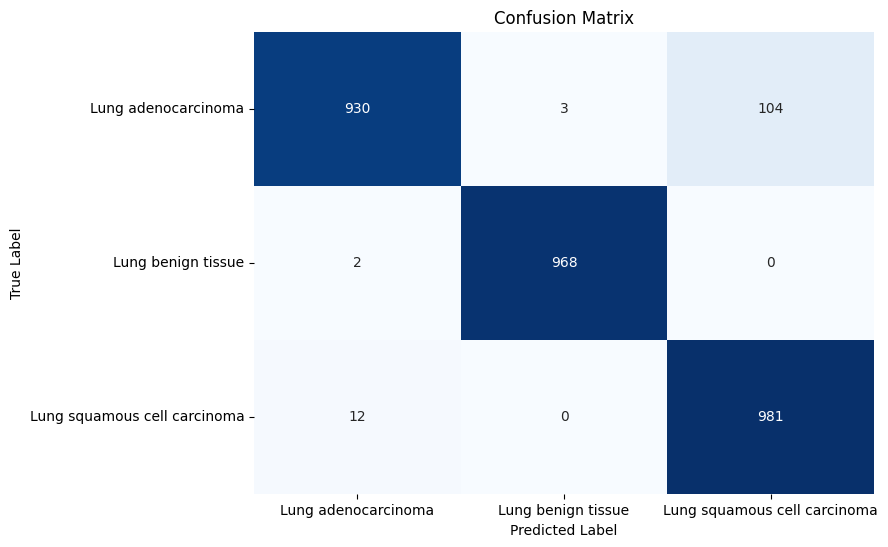

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

all_labels = []
all_preds = []

model.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        
        # Görüntüleri ve etiketleri cihaza taşı
        images, labels = images.to(device), labels.to(device)
        
        # İleri geçiş
        outputs = model(images)
        predicted = torch.argmax(outputs, dim=1).float()
        
        # Tüm etiketleri ve tahminleri listeye ekle
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())


all_labels = np.array(all_labels)
all_preds = np.array(all_preds)


class_report = classification_report(all_labels, all_preds, digits=4)
print('Classification Report:')
print(class_report)


conf_matrix = confusion_matrix(all_labels, all_preds)


class_names = ["Lung adenocarcinoma", "Lung benign tissue", "Lung squamous cell carcinoma"]

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, 
            yticklabels=class_names, cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
